In [ ]:
#CodeMusai Alpha - 0.0.1

#Simple probability mapping given the last character predict the next, this is a bigram model.
#Added to a neuralnet, used negitive log likelihood as loss, and iterate to lower by adjusting weights a prediction points.

#Note, since the only thing that is known at a prediction point is the previous character, 
#even after training results are expected to be low quality.

In [1]:
#load training material
words = open('activeTrainingMaterial_lower.txt', 'r').read().lower().split()
words[:19]

['a',
 'painted',
 'christmas',
 'an',
 'original',
 'story',
 'of',
 'life',
 'potential',
 'wonder',
 'and',
 'acceptance.',
 'tree',
 'log',
 'week',
 'oneat',
 'one',
 'two',
 'five']

In [2]:
#words = [word.lower() for word in words]

b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        #print(ch1, ch2)

wordCount = len(words)
print(f"{wordCount} words in training material")
chars = sorted(list(set(''.join(words))))
characterCount = len(chars)
print(f"{characterCount} unique character tokens for network")

156969 words in training material
29 unique character tokens for network


['.', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[ . .  at  0 , 0 ], [ . ;  at  0 , 1 ], [ . ?  at  0 , 2 ], [ . a  at  0 , 3 ], 
[ . b  at  0 , 4 ], [ . c  at  0 , 5 ], [ . d  at  0 , 6 ], [ . e  at  0 , 7 ], 
[ . f  at  0 , 8 ], [ . g  at  0 , 9 ], [ . h  at  0 , 10 ], [ . i  at  0 , 11 ], 
[ . j  at  0 , 12 ], [ . k  at  0 , 13 ], [ . l  at  0 , 14 ], [ . m  at  0 , 15 ], 
[ . n  at  0 , 16 ], [ . o  at  0 , 17 ], [ . p  at  0 , 18 ], [ . q  at  0 , 19 ], 
[ . r  at  0 , 20 ], [ . s  at  0 , 21 ], [ . t  at  0 , 22 ], [ . u  at  0 , 23 ], 
[ . v  at  0 , 24 ], [ . w  at  0 , 25 ], [ . x  at  0 , 26 ], [ . y  at  0 , 27 ], 
[ . z  at  0 , 28 ], [ ; .  at  1 , 0 ], [ ; ;  at  1 , 1 ], [ ; ?  at  1 , 2 ], 
[ ; a  at  1 , 3 ], [ ; b  at  1 , 4 ], [ ; c  at  1 , 5 ], [ ; d  at  1 , 6 ], 
[ ; e  at  1 , 7 ], [ ; f  at  1 , 8 ], [ ; g  at  1 , 9 ], [ ; h  at  1 , 10 ], 
[ ; i  at  1 , 11 ], [ ;

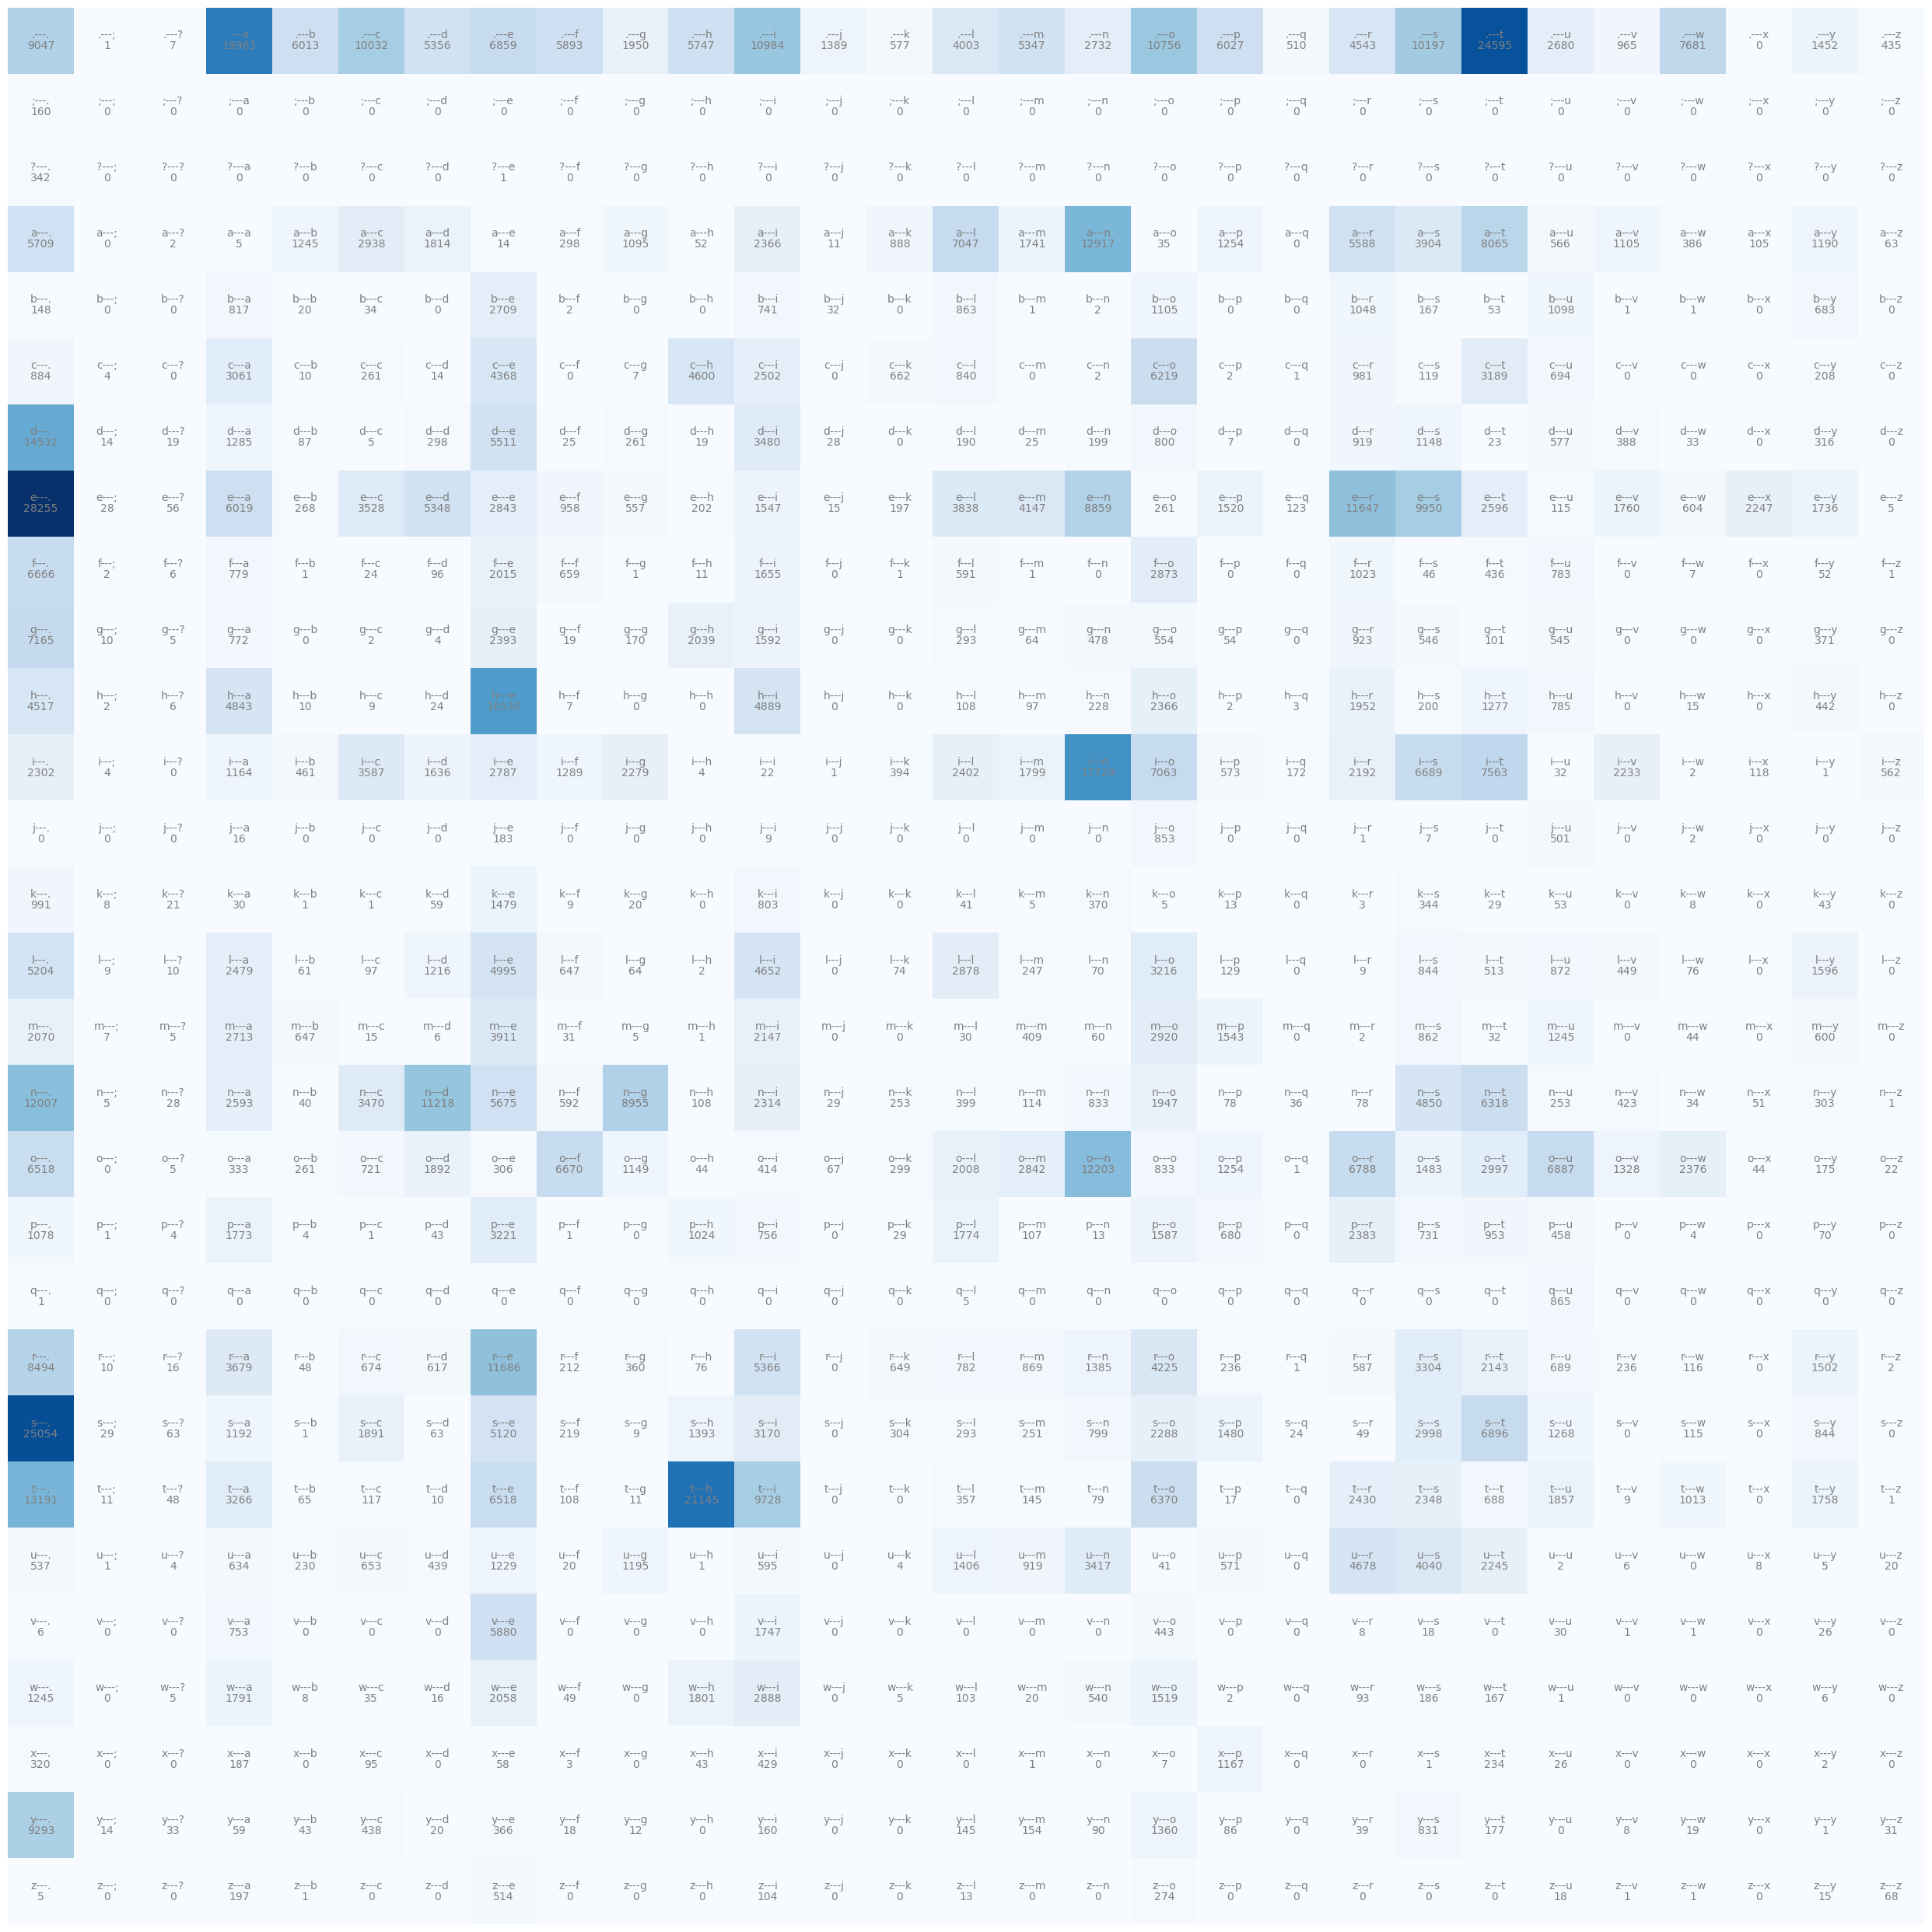

In [5]:
#prepare data
plotData = True


import torch
N = torch.zeros((characterCount, characterCount), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
print(chars)
z = len(chars)
#i = stoi['.']
#i2 = stoi['!']
#stoi['!'] = i
#stoi['.'] = i2

itos = {i:s for s,i in stoi.items()} #stoi['i'] #<==> itos[30]

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        #print(ch1, ch2)

subIndex = 0
maxSubCycles = 4
if (plotData):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure(figsize=[32,32]) 
    plt.imshow(N, cmap='Blues') 
    for i in range(characterCount): 
        for j in range(characterCount): 
            if (subIndex >= maxSubCycles):
                print('')
                subIndex = 0

            print('[', itos[i],itos[j], ' at ', i, ',', j, '], ', end='')
            
            chstr = itos[i] + '---' + itos[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray') 
            plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') 
            subIndex += 1
    plt.axis('off');



In [9]:
#results without training
p = torch.rand(3)
p = p / p.sum()
P = N.float()
P /= P.sum(1, keepdim=True)

for i in range(20):
    ix = 0
    out = []
    while True:
        #p = N[ix].float()
        #p = p / p.sum()
        ##p = torch.ones(51)  / 51.0
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    #print(''.join(out) + '.')    
    print(''.join(out), end=' ', flush=True)


#prepare for training
#  init weights
W = torch.randn((characterCount, characterCount), requires_grad=True)
#  create bigram training set (x,y)
xs, ys =[], []
nx = 0

for w in words[:2]:
    if (nx==0):
        nx+=1
        continue
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

ustisipthive. s. ss. wanse. th. t. ad. t. deg. vembis. d. ia. al. biorestiound. f. angelseggs. t. qupin. pre. p. 

In [10]:
#training loop
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=characterCount).float() #prepare // input layer to neuralnet
xenc
n = 0
learningRate = 0.1
maxTrainingIterations = 10000
print(f"Starting Training of {maxTrainingIterations} at a learning rate of {learningRate}...")
for k in range(maxTrainingIterations):
    n += 1
    #forward pass
    xenc = F.one_hot(xs, num_classes=characterCount).float()
    logits = xenc @ W #predict log-counts
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(8), ys].log().mean() + 0.01*(W**2).mean()
    if (n== 1):
        print('Loss: ' + str(loss.item()) + ' >> ', end='')
    elif (n== 1 or n == maxTrainingIterations):
        print(str(loss.item()) + '')
    
    #backward pass
    W.grad = None #set to zero gradient
    loss.backward()
    
    #update
    W.data += -learningRate * W.grad


Starting Training of 10000 at a learning rate of 0.1...
Loss: 3.540121555328369 >> 0.02390798181295395


In [11]:
#generate
samples = 100

print(f"\rGenerating {samples}...")
for i in range(samples):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix].replace('.', ' '))
        if ix == 0:
            break
    #print(''.join(out) + '.')    
    result = ''.join(out)
    print(result, end='', flush=True)
print('.')

Generating 100...
dave sp pas ecogacoftinevetenl be ithe hirethearakshre atid inompplerachewe l ces th od of lysa san orticigemiolit m aflond qumin pey cond s to the f ing nct e d s akiniong twitit aupp hontthars lce arong sts mens s ornco thiknf he on prntif a cers thrsserthas  my feninelarewon rebivert al heduil ur pod couthequrtssormerioacousthene teridwonthen ore ange ci cher lontikexit alap thas s aptig aty bo frrtuns atus  sphit theant hemuriamsthem thtisl ms ptid frmisthe cow mbeteveathondod rioutouce igaw r derer ched s f c burk theres f robie il theak; a wis tsold atoscenctifotomyed pprat .
